# Chapter 8: From Cells to Populations — The SIR Model and Stability Analysis

In [1]:
import cospar as cs
cs.settings.set_figure_params()

#### Lab 3: Simulating an Epidemic

# Base model (change the infection rate)

Basic Reproduction Number (R0): 1.00


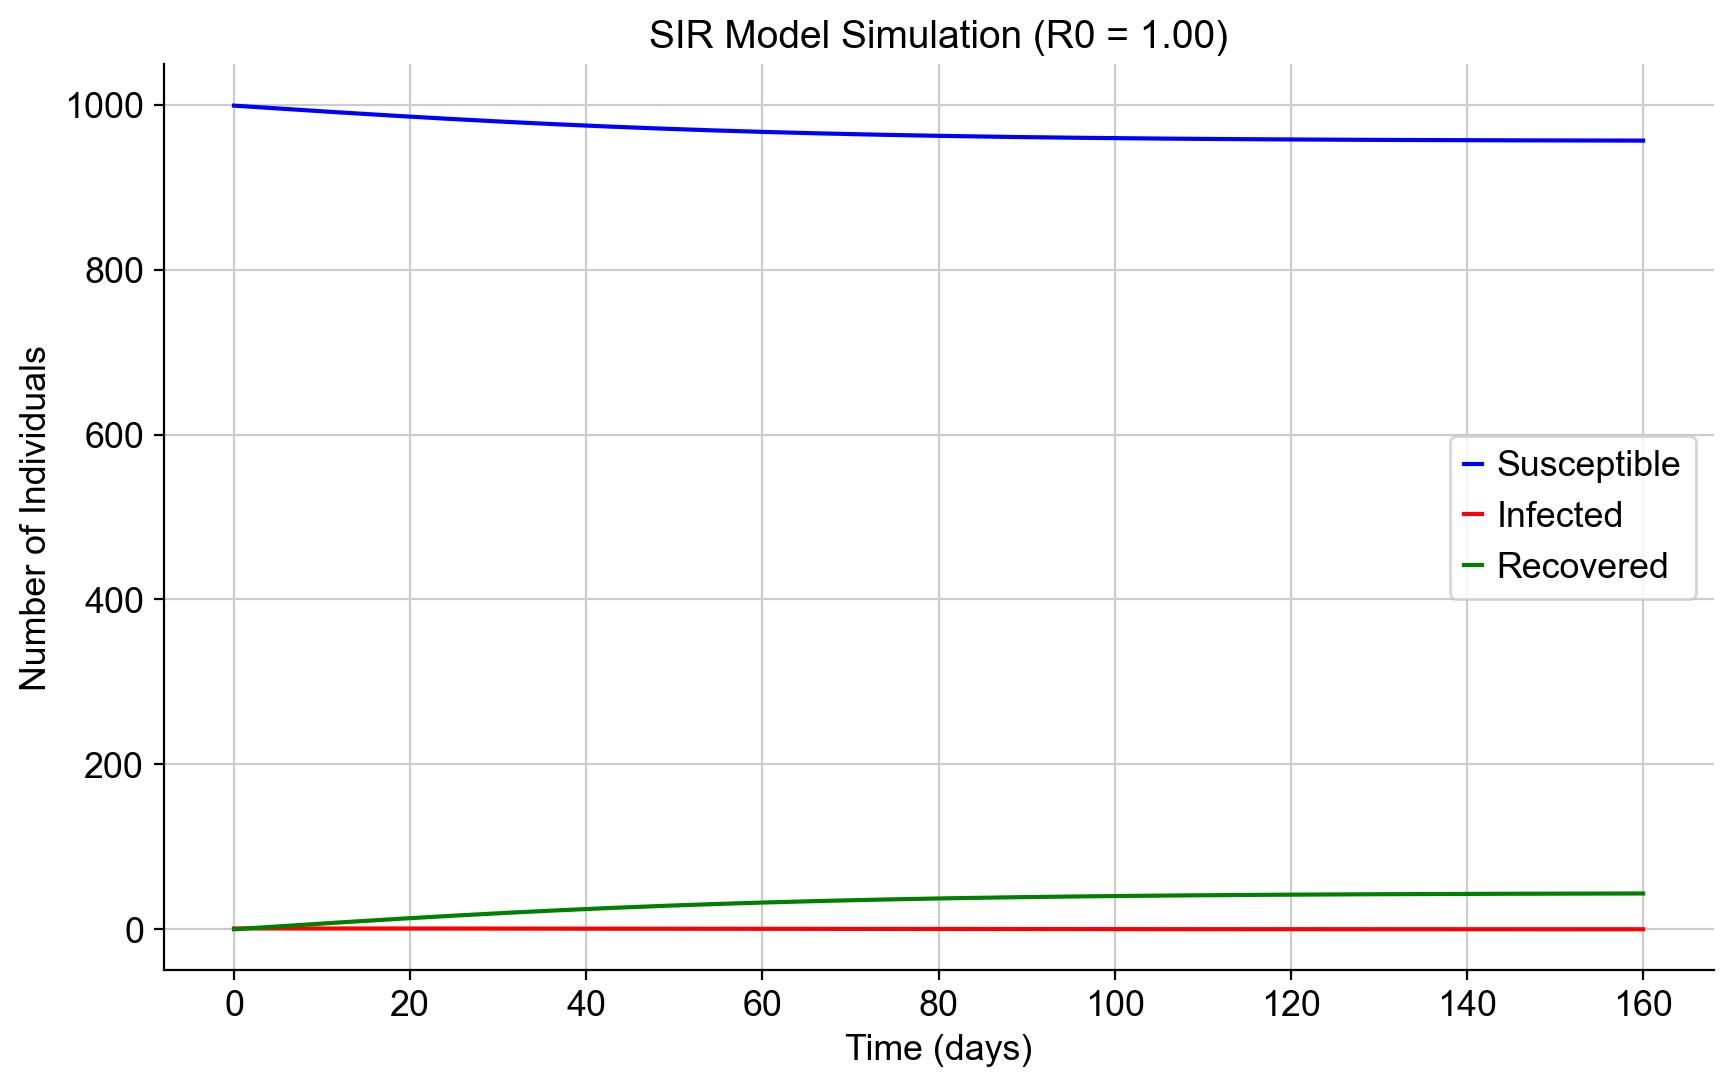

In [22]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the SIR model ODEs
def sir_model(t, y, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt =  beta * S * I / N - gamma * I
    dRdt =  gamma * I
    return [dSdt, dIdt, dRdt]

# Parameters
N = 1000      # Total population
I0, R0 = 1, 0 # Initial infected and recovered
S0 = N - I0 - R0
beta = 0.7    # Transmission rate
gamma = 0.7   # Recovery rate (1/gamma = 10 days infectious)
R_0 = beta / gamma
print(f"Basic Reproduction Number (R0): {R_0:.2f}")

# Initial conditions vector
y0 = [S0, I0, R0]

# Time grid (in days)
t_max=160
t_span = [0, t_max]
t_eval = np.linspace(t_span[0], t_span[1], t_max)

# Integrate the SIR equations
sol = solve_ivp(sir_model, t_span, y0, args=(N, beta, gamma), t_eval=t_eval)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], 'b', label='Susceptible')
plt.plot(sol.t, sol.y[1], 'r', label='Infected')
plt.plot(sol.t, sol.y[2], 'g', label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.title(f'SIR Model Simulation (R0 = {R_0:.2f})')
plt.legend()
plt.grid(True)
plt.show()

# The phase diagram

In [3]:
def simulate_the_dynamics(beta,gamma):
    N = 1000      # Total population
    I0, R0 = 1, 0 # Initial infected and recovered
    S0 = N - I0 - R0
    #beta = 0.1    # Transmission rate
    #gamma = 0.1   # Recovery rate (1/gamma = 10 days infectious)
    R_0 = beta / gamma
    #print(f"Basic Reproduction Number (R0): {R_0:.2f}")

    # Initial conditions vector
    y0 = [S0, I0, R0]

    # Time grid (in days)
    t_span = [0, 1600]
    t_eval = np.linspace(t_span[0], t_span[1], 1600)

    # Integrate the SIR equations
    sol = solve_ivp(sir_model, t_span, y0, args=(N, beta, gamma), t_eval=t_eval)
    return (N-sol.y[0][-1])/N

In [4]:
beta_list=np.arange(1,21,1)/40
gamma_list=np.arange(1,21,1)/40

affected_fraction_list=[]
beta_list_new=[]
gamma_list_new=[]
for beta in beta_list:
    for gamma in gamma_list:
        affected_fraction=simulate_the_dynamics(beta,gamma)
        affected_fraction_list.append(affected_fraction)
        beta_list_new.append(beta)
        gamma_list_new.append(gamma)

Text(0, 0.5, 'Fraction of affected population')

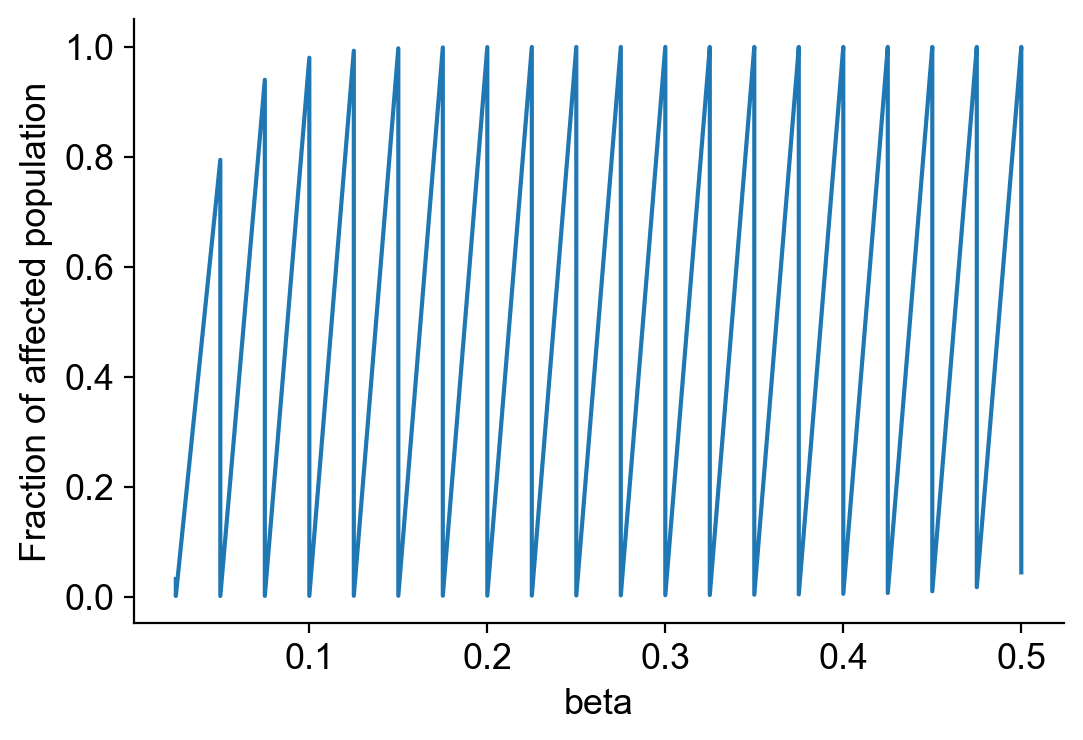

In [7]:
plt.plot(beta_list_new,affected_fraction_list)
plt.xlabel('beta')
plt.ylabel('Fraction of affected population')


Text(0, 0.5, 'Fraction of affected population')

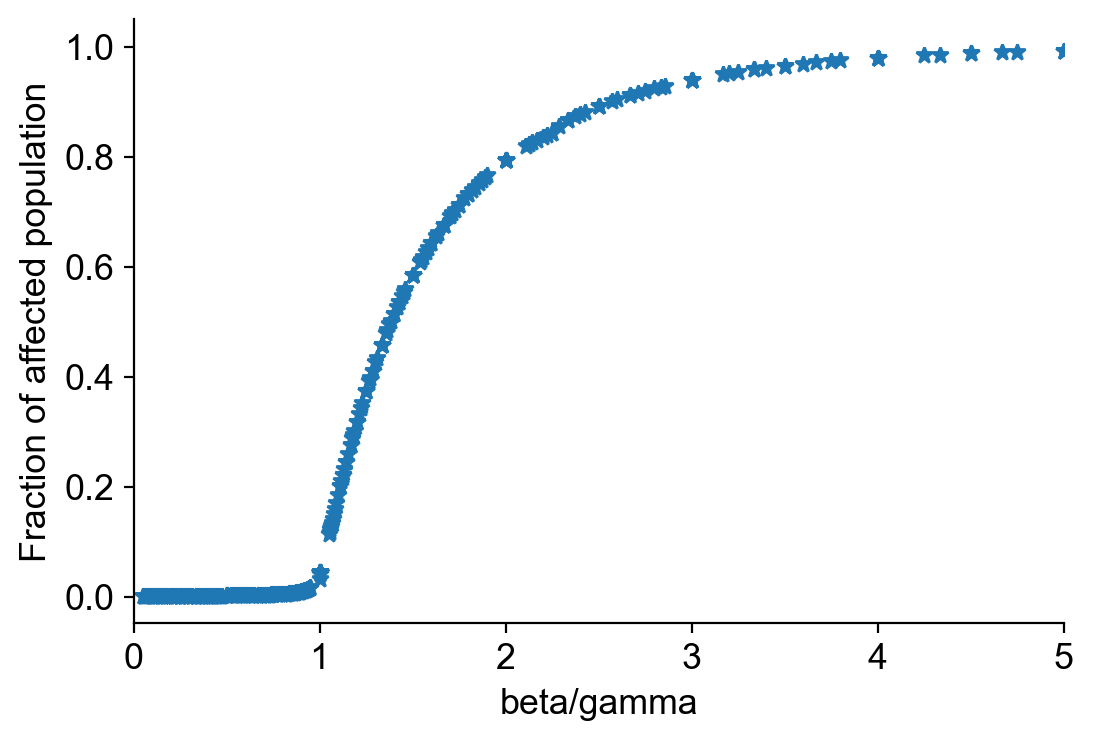

In [10]:
R0_list=np.array(beta_list_new)/np.array(gamma_list_new)
plt.plot(R0_list,affected_fraction_list,'*')
plt.xlabel('beta/gamma')
plt.xlim([0,5])
plt.ylabel('Fraction of affected population')

# Herd immunity (change the initial recovered person)

Basic Reproduction Number (R0): 2.00


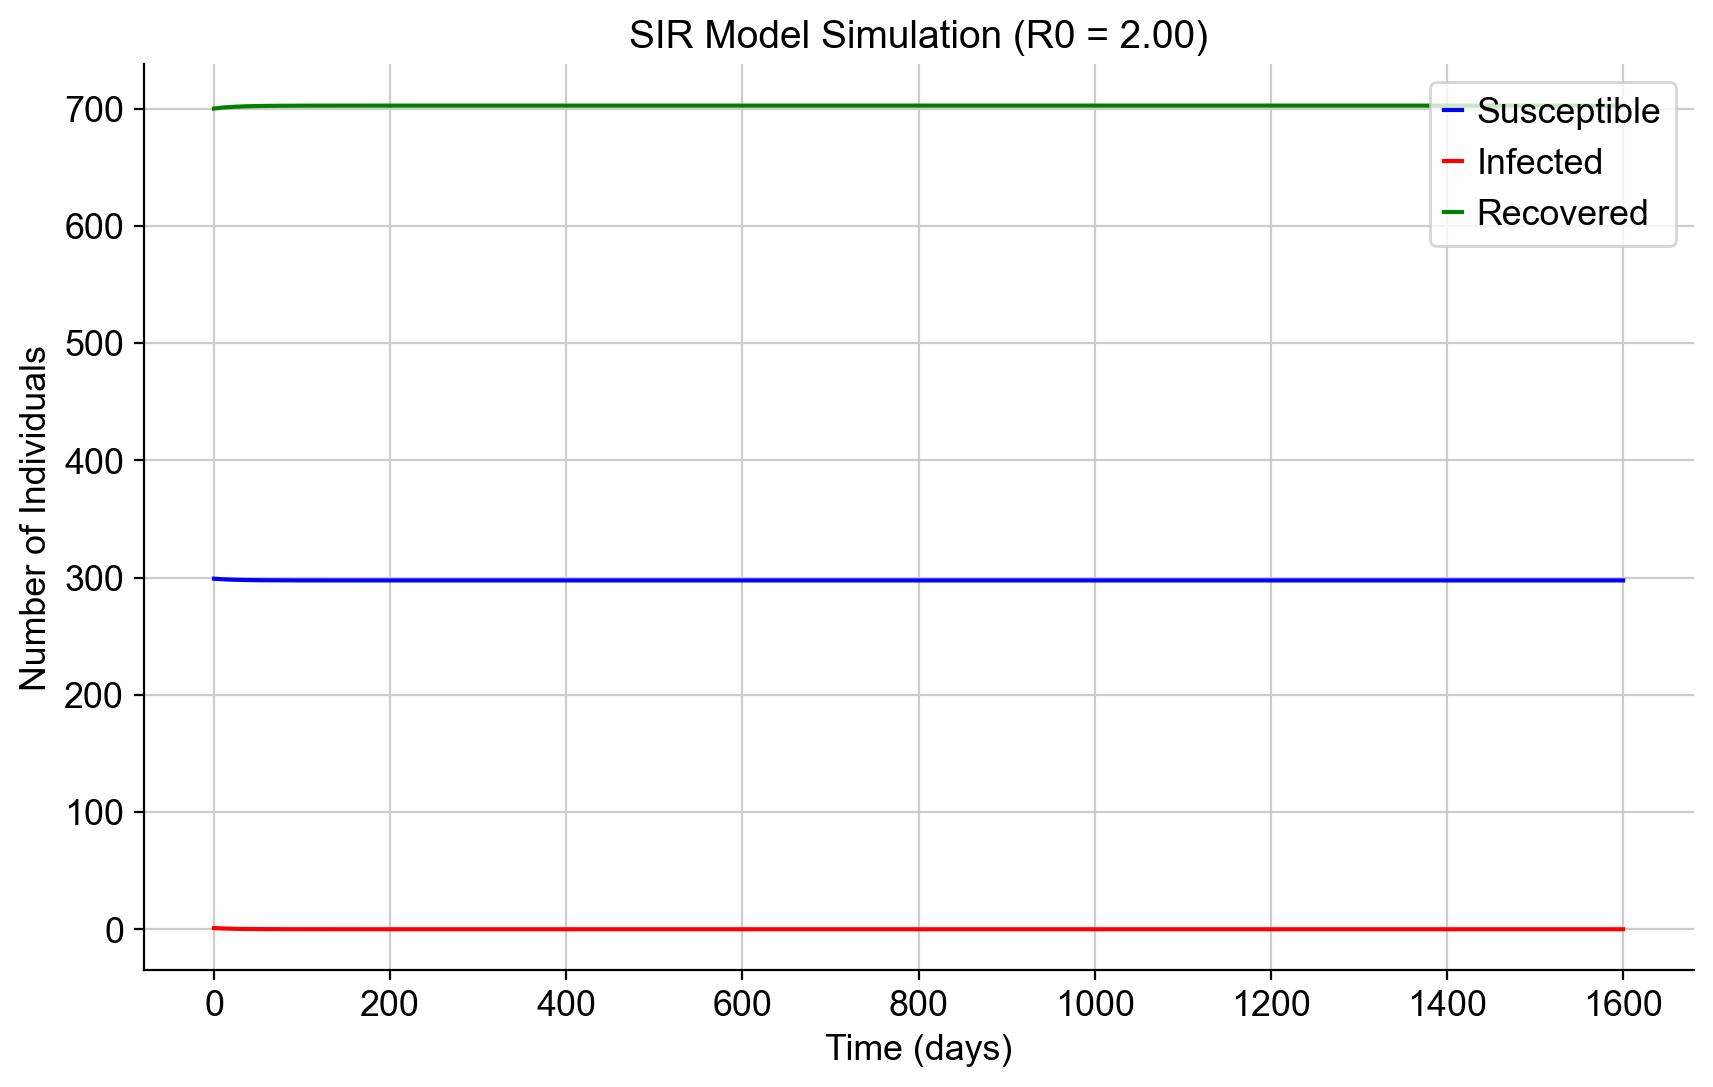

In [29]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the SIR model ODEs
def sir_model(t, y, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt =  beta * S * I / N - gamma * I
    dRdt =  gamma * I
    return [dSdt, dIdt, dRdt]

# Parameters
N = 1000      # Total population
I0, R0 = 1, 700 # Initial infected and recovered
S0 = N - I0 - R0
beta = 0.2    # Transmission rate
gamma = 0.1   # Recovery rate (1/gamma = 10 days infectious)
R_0 = beta / gamma
print(f"Basic Reproduction Number (R0): {R_0:.2f}")

# Initial conditions vector
y0 = [S0, I0, R0]

# Time grid (in days)
t_max=1600
t_span = [0, t_max]
t_eval = np.linspace(t_span[0], t_span[1], t_max)

# Integrate the SIR equations
sol = solve_ivp(sir_model, t_span, y0, args=(N, beta, gamma), t_eval=t_eval)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], 'b', label='Susceptible')
plt.plot(sol.t, sol.y[1], 'r', label='Infected')
plt.plot(sol.t, sol.y[2], 'g', label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.title(f'SIR Model Simulation (R0 = {R_0:.2f})')
plt.legend()
plt.grid(True)
plt.show()